# TP SVM Novembre 2017

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
# importer les données
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
# afficher la description de la base de données
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# iris.feature_names[]
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### SVM à noyau linéaire
Nous allons nous limiter pour l'instant à deux classes : setosa et virginica, et à deux features (pour visualiser) : sepal length and sepal width. Nous allons entrainer une SVM linéaire et afficher l'hyperplan séparateur (en 2D une droite donc).

Nous allons utiliser la classe [SVC](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) du module svm de scikit-learn.

In [13]:
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1000)
# on sélectionne les données voulues (2 classes et 2 features)
X = iris.data[iris.target!=1, :2]
print(X.shape)
y = iris.target[iris.target!=1]
print(y.shape)
clf.fit(X, y)

(100, 2)
(100,)


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### Représentons l'hyperplan séparateur !

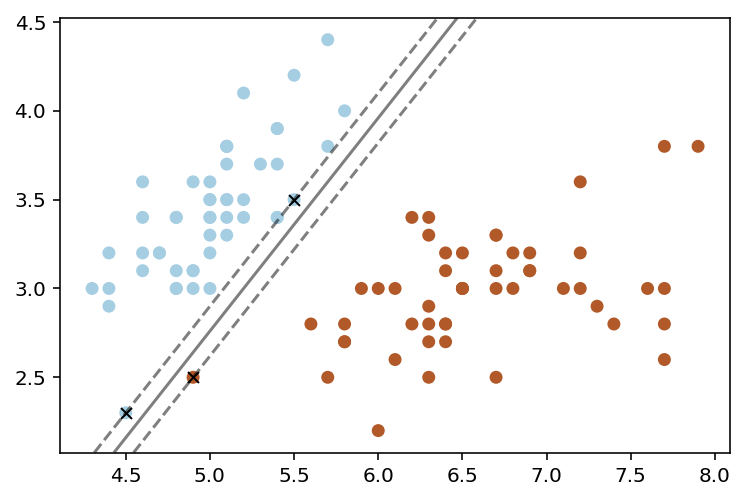

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')

__Question :__ Où sont situés les vecteurs de support ?

__Réponse :__ 

#### Affichons la performance du prédicteur

In [15]:
print(clf.score(X, y))

1.0


__Question :__ Quelle mesure de performance est calculée par `clf.score` ? Référez-vous à la [documentation](http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC.score). Que veut dire une performance de 1.0 ?

__Réponse :__

Considérons maintenant les deux classes Versicolour et Virginica !

In [16]:
clf = svm.SVC(kernel='linear', C=1000)

# on sélectionne les données voulues (2 classes et 2 features)
X = iris.data[iris.target!=0, :2]
print(X.shape)
y = iris.target[iris.target!=0]
print(y.shape)
clf.fit(X, y)

(100, 2)
(100,)


SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

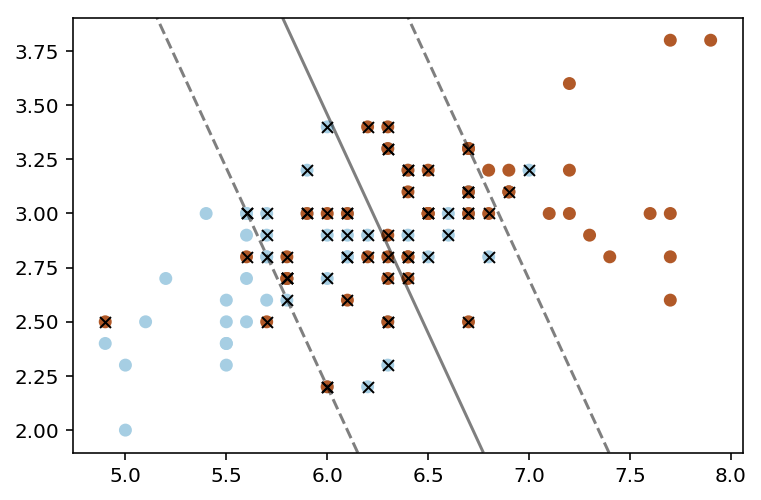

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')

__Question :__ Où sont situés les vecteurs de support ?

__Réponse :__ 

Quelle est la performance de ce modèle ?

In [18]:
print(clf.score(X, y))

0.73


La performance n'est que de 0.73. Essayons d'utiliser un noyau pour avoir une séparation plus complexe et mieux coller aux données !

### SVM à noyau non linéaire

Nous allons utiliser un noyau RBF gaussien, pour plusieurs valeurs du paramètre gamma. En classe nous avons donné la formule 
$k(x, x') = \frac{1}{\sqrt{2 \pi}} \exp\frac{||x - x'||^2}{2 \sigma^2}$ pour le noyau gaussien. 

__Question :__ À quoi correspond le paramètre gamma ?

__Réponse :__

In [24]:
# Valeurs de gamma
gamma_range = np.linspace(50, 2000, 50)

for param in gamma_range:
    clf = svm.SVC(kernel='rbf', C=0.01, gamma=param)
    clf.fit(X, y)
    print("gamma: %.2f" % param, "score: %.2f" % clf.score(X, y))
    
best_gamma = 169

gamma: 50.00 score: 0.80
gamma: 89.80 score: 0.87
gamma: 129.59 score: 0.87
gamma: 169.39 score: 0.89
gamma: 209.18 score: 0.89
gamma: 248.98 score: 0.89
gamma: 288.78 score: 0.89
gamma: 328.57 score: 0.89
gamma: 368.37 score: 0.89
gamma: 408.16 score: 0.89
gamma: 447.96 score: 0.89
gamma: 487.76 score: 0.89
gamma: 527.55 score: 0.89
gamma: 567.35 score: 0.89
gamma: 607.14 score: 0.89
gamma: 646.94 score: 0.89
gamma: 686.73 score: 0.89
gamma: 726.53 score: 0.89
gamma: 766.33 score: 0.89
gamma: 806.12 score: 0.89
gamma: 845.92 score: 0.89
gamma: 885.71 score: 0.89
gamma: 925.51 score: 0.89
gamma: 965.31 score: 0.89
gamma: 1005.10 score: 0.89
gamma: 1044.90 score: 0.89
gamma: 1084.69 score: 0.89
gamma: 1124.49 score: 0.89
gamma: 1164.29 score: 0.89
gamma: 1204.08 score: 0.89
gamma: 1243.88 score: 0.89
gamma: 1283.67 score: 0.89
gamma: 1323.47 score: 0.89
gamma: 1363.27 score: 0.89
gamma: 1403.06 score: 0.89
gamma: 1442.86 score: 0.89
gamma: 1482.65 score: 0.89
gamma: 1522.45 score: 0.89


__Question :__ Affichez maintenant la frontière de séparation pour le dernier de ces classifieurs, qui a un score de 0.80, et donc nettement meilleur que le modèle linéaire précédent (score = 0.73).

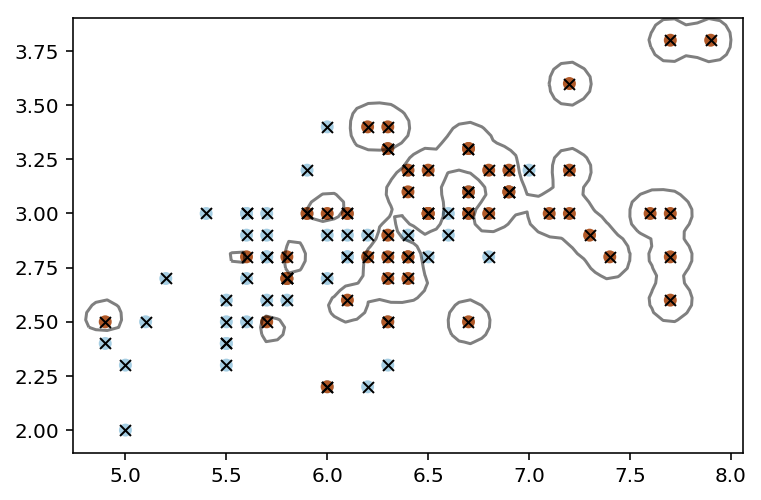

In [31]:
# Réponse : plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

clf = svm.SVC(kernel='rbf', C=0.01, gamma=169)
clf.fit(X, y)
# plot the decision function
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 60)
yy = np.linspace(ylim[0], ylim[1], 60)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# plot support vectors
#ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
#           linewidth=1, facecolors='none')

ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=30,
           linewidth=1, marker='x', color='k')

__Question :__ Quels points sont vecteurs de supports ? Pensez-vous que le modèle va bien généraliser ?

__Réponse :__

Est-ce que ce modèle se __généralise__ bien, autrement dit, sera-t-il capable de faire de bonnes prédictions sur de nouvelles données que nous n'avons pas utilisées pour le construire ? 

Pour le savoir, nous allons séparer les données en un __jeu d'entraînement__ et un __jeu de test__. Nous allons entraîner nos SVMs sur le jeu d'entraînement seulement, et mesurer leur performance sur le jeu de test. Le jeu de test, étant inconnu au moment de l'entraînement, fait figure de nouvelles données. Pour cela nous allons utiliser la fonction `train_test_split` de scikit-learn, décrite [ici](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=56)

acc_train, acc_test = list(), list()
for param in np.linspace(0.1, 50, 20):
    clf = svm.SVC(kernel='rbf', C=0.01, gamma=param)
    clf.fit(X_train, y_train)
    acc_train.append(clf.score(X_train, y_train))
    acc_test.append(clf.score(X_test, y_test))

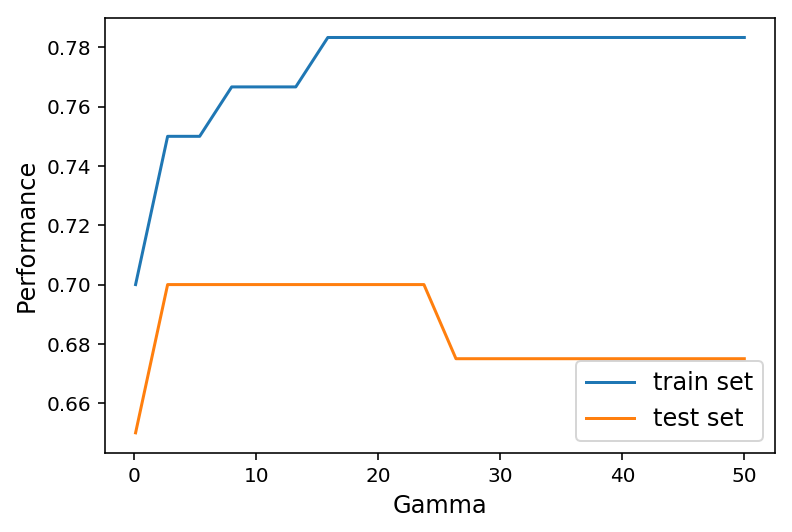

In [73]:
# Afficher le score sur le jeu d'entraînement / le jeu de test pour chaque valeur du paramètre gamma
plt.plot(np.linspace(0.1, 50, 20), acc_train, label='train set')
plt.plot(np.linspace(0.1, 50, 20), acc_test, label='test set')

plt.xlabel("Gamma", fontsize=12)
plt.ylabel("Performance", fontsize=12)

plt.legend(loc='best', fontsize=12)

__Question : __ Observez-vous un effet de surapprentissage ? Où ? 

__Réponse :__  Oui quand gamma dépasse 25

Le graphique ci-dessus nous donne envie de prendre pour le paramètre gamma une valeur proche de 10 ou 20. Mais attention ! Si nous prenons le paramètre qui marche le mieux sur le dataset de test, nous risquons aussi de surapprendre : nous aurons alors utilisé le jeu de test pour choisir le meilleur modèle, autrement dit, nous aurons touché aux données soi-disant inconnuees lors de l'apprentissage...

Pour éviter cela, nous allons faire une __validation croisée__ (_cross-validation_) sur le jeu d'entraînement.

Nous allons pour cela utiliser la classe [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) du module model_selection de scikit-learn.

In [90]:
'''
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
# Définir les paramètres à tester
parameters = {'kernel': ('linear', 'rbf'), 
              'C':[0,1,10],
              'gamma':[10,20]}
# Initialiser un classifieur SVM
svc = svm.SVC()

# Initialiser une validation croisée
clf = GridSearchCV(svc, parameters, cv=3)
# Faire tourner la validation croisée sur le jeu d'entraînement
clf=clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))
print(clf.best_params_)
'''
from sklearn.model_selection import GridSearchCV

# Définir les paramètres à tester
parameters = {'kernel': ('linear', 'rbf', 'poly'),
              'C': [0.1, 1, 10],
              'gamma': [i for i in range(1,10)]
              }

# Initialiser un classifieur SVM
svc = svm.SVC()

# Initialiser une validation croisée
clf = GridSearchCV(svc, parameters, cv=3)

# Faire tourner la validation croisée sur le jeu d'entraînement
clf.fit(X_train, y_train)
print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))
print(clf.best_params_)

0.72
0.78
{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}


In [91]:

print (clf.get_params())

plt.imshow(clf.cv_results_['mean_test_score'].reshape(len(parameters['kernel']), 
                                                      len(parameters['C'])), interpolation='none')
plt.xlabel('C', fontsize=14)
plt.ylabel('noyau', fontsize=14)
plt.title("Score", fontsize=14)

plt.xticks(np.arange(len(parameters['C'])), parameters['C'], rotation=45)
plt.yticks(np.arange(len(parameters['kernel'])), parameters['kernel'], rotation=45)

plt.colorbar()


{'cv': 3, 'error_score': 'raise-deprecating', 'estimator__C': 1.0, 'estimator__cache_size': 200, 'estimator__class_weight': None, 'estimator__coef0': 0.0, 'estimator__decision_function_shape': 'ovr', 'estimator__degree': 3, 'estimator__gamma': 'auto_deprecated', 'estimator__kernel': 'rbf', 'estimator__max_iter': -1, 'estimator__probability': False, 'estimator__random_state': None, 'estimator__shrinking': True, 'estimator__tol': 0.001, 'estimator__verbose': False, 'estimator': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False), 'fit_params': None, 'iid': 'warn', 'n_jobs': None, 'param_grid': {'kernel': ('linear', 'rbf', 'poly'), 'C': [0.1, 1, 10], 'gamma': [1, 2, 3, 4, 5, 6, 7, 8, 9]}, 'pre_dispatch': '2*n_jobs', 'refit': True, 'return_train_score': 'warn', 'scoring': None, 'verbose': 0}


ValueError: cannot reshape array of size 81 into shape (3,3)

__Question :__ Quel est le rôle du paramètre C ? Qu'observez-vous quand C est grand ? 

__Réponse :__ C joue le rôle de 1/lambda et donc plus C est grand et moins on regularise nos parametres

### Mise en pratique : sélectionnons les meilleurs paramètres de SVM pour la classification avec les 4 paramètres disponibles

__Question :__ Entraînez une SVM de classification pour séparer les données sur les deux problèmes (setosa vs virginica, puis versicolor vs virginica). Entraînez votre SVM en validation croisée sur le jeu d'entraînement. Quels paramètres pouvez-vous faire varier ? 

Quelle est la performance de votre modèle optimal _sur le jeu de test_ ? 

##### 1) Setosa vs virginica

In [100]:
from sklearn import svm
# on sélectionne les données voulues (2 classes et 2 features)
X = iris.data[iris.target!=1, :4]
y = iris.target[iris.target!=1]
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=56)

parameters = {'kernel': ('linear', 'rbf', 'poly'),
              'C': [0.1, 1, 2, 4, 10],
              'gamma': [i for i in range(1,10)]
              }

# Initialiser un classifieur SVM
svc = svm.SVC()

# Initialiser une validation croisée
clf = GridSearchCV(svc, parameters, cv=3)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))

100


{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
1.0
1.0


##### 2) Versicolour et Virginica

In [101]:
from sklearn import svm
# on sélectionne les données voulues (2 classes et 2 features)
X = iris.data[iris.target!=0, :4]
y = iris.target[iris.target!=0]
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=56)

parameters = {'kernel': ('linear', 'rbf', 'poly'),
              'C': [0.1, 1, 2, 4, 10],
              'gamma': [i for i in range(1,10)]
              }

# Initialiser un classifieur SVM
svc = svm.SVC()

# Initialiser une validation croisée
clf = GridSearchCV(svc, parameters, cv=3)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.9
0.9666666666666667


__Question bonus :__ Comment construiriez-vous un modèle multi-classe, à base de SVMs, qui assigne une nouvelle observation à une des trois classes setosa, virginica ou versicolor ?

In [ ]:
from sklearn import svm
# on sélectionne les données voulues (2 classes et 2 features)
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=56)

parameters = {'kernel': ('linear', 'rbf', 'poly'),
              'C': [0.1, 1, 2, 4, 10],
              'gamma': [i for i in range(1,10)]
              }

# Initialiser un classifieur SVM
svc = svm.SVC()

# Initialiser une validation croisée
clf = GridSearchCV(svc, parameters, cv=3)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.score(X_test,y_test))
print(clf.score(X_train,y_train))
print(clf.predict([[1,1,1,1]]))

{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}
0.9333333333333333
1.0
[0]
